In [405]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_excel('World_development_mesurement (1).xlsx', sheet_name=0)  # Reads the first sheet
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [407]:
#Seperating numerical and categorical columns from the dataset
df_num = df.select_dtypes(include = ['int64', 'float64'])
df_num

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
0,0.020,87931.0,NaN,NaN,26998.0,0.035,NaN,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599
1,0.050,9542.0,NaN,NaN,7499.0,0.034,NaN,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324
2,0.043,1617.0,NaN,NaN,1983.0,0.043,NaN,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383
3,0.027,4276.0,NaN,NaN,1836.0,0.047,NaN,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532
4,0.046,1041.0,NaN,NaN,NaN,0.051,NaN,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,32427,0.911
2700,0.013,NaN,5.0,4.0,2132446.0,0.179,175.0,0.006,0.8,0.033,81.0,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811
2701,0.015,NaN,7.0,85.0,NaN,0.089,310.0,0.010,0.5,0.112,80.0,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948
2702,0.020,NaN,144.0,180.0,NaN,0.046,792.0,0.013,0.5,0.164,78.0,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889


In [408]:
df_cat = df.select_dtypes(include = ['object'])
df_cat

,Business Tax Rate,Country,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound
0,NaN,Algeria,"$54,790,058,957",$60,"$102,000,000","$193,000,000"
1,NaN,Angola,"$9,129,594,819",$22,"$34,000,000","$146,000,000"
2,NaN,Benin,"$2,359,122,303",$15,"$77,000,000","$50,000,000"
3,NaN,Botswana,"$5,788,311,645",$152,"$227,000,000","$209,000,000"
4,NaN,Burkina Faso,"$2,610,959,139",$12,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...
2699,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN
2700,46.4%,United States,"$16,244,600,000,000","$8,895","$200,092,000,000","$126,573,000,000"
2701,41.9%,Uruguay,"$50,004,354,667","$1,308","$2,222,000,000","$1,028,000,000"
2702,61.9%,"Venezuela, RB","$381,286,223,859",$593,"$904,000,000","$3,202,000,000"


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [410]:
df = df.drop(['Number of Records'],axis=1)

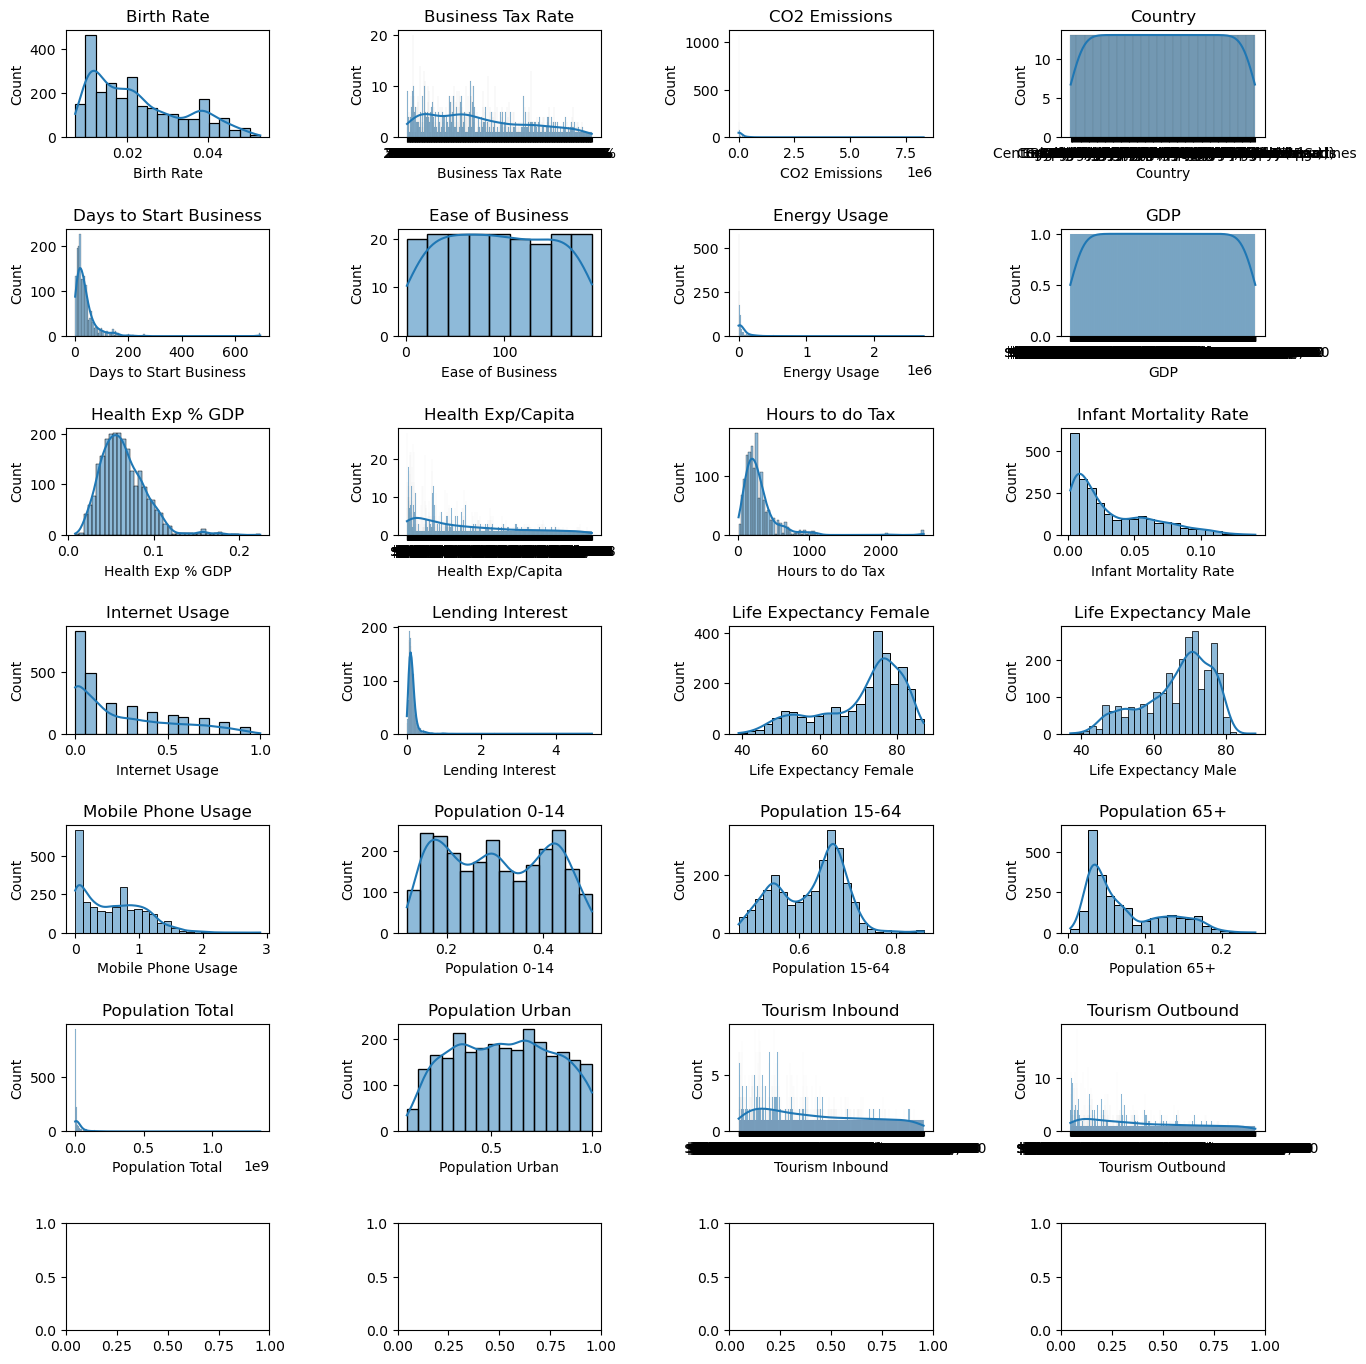

In [411]:
# Create subplots
fig, axes = plt.subplots(7, 4, figsize=(14, 14), sharex=False, sharey=False)
axes = axes.flatten()

columns = df.columns  

for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout(pad=2.0)
plt.show()


In [412]:
!pip install seaborn --upgrade

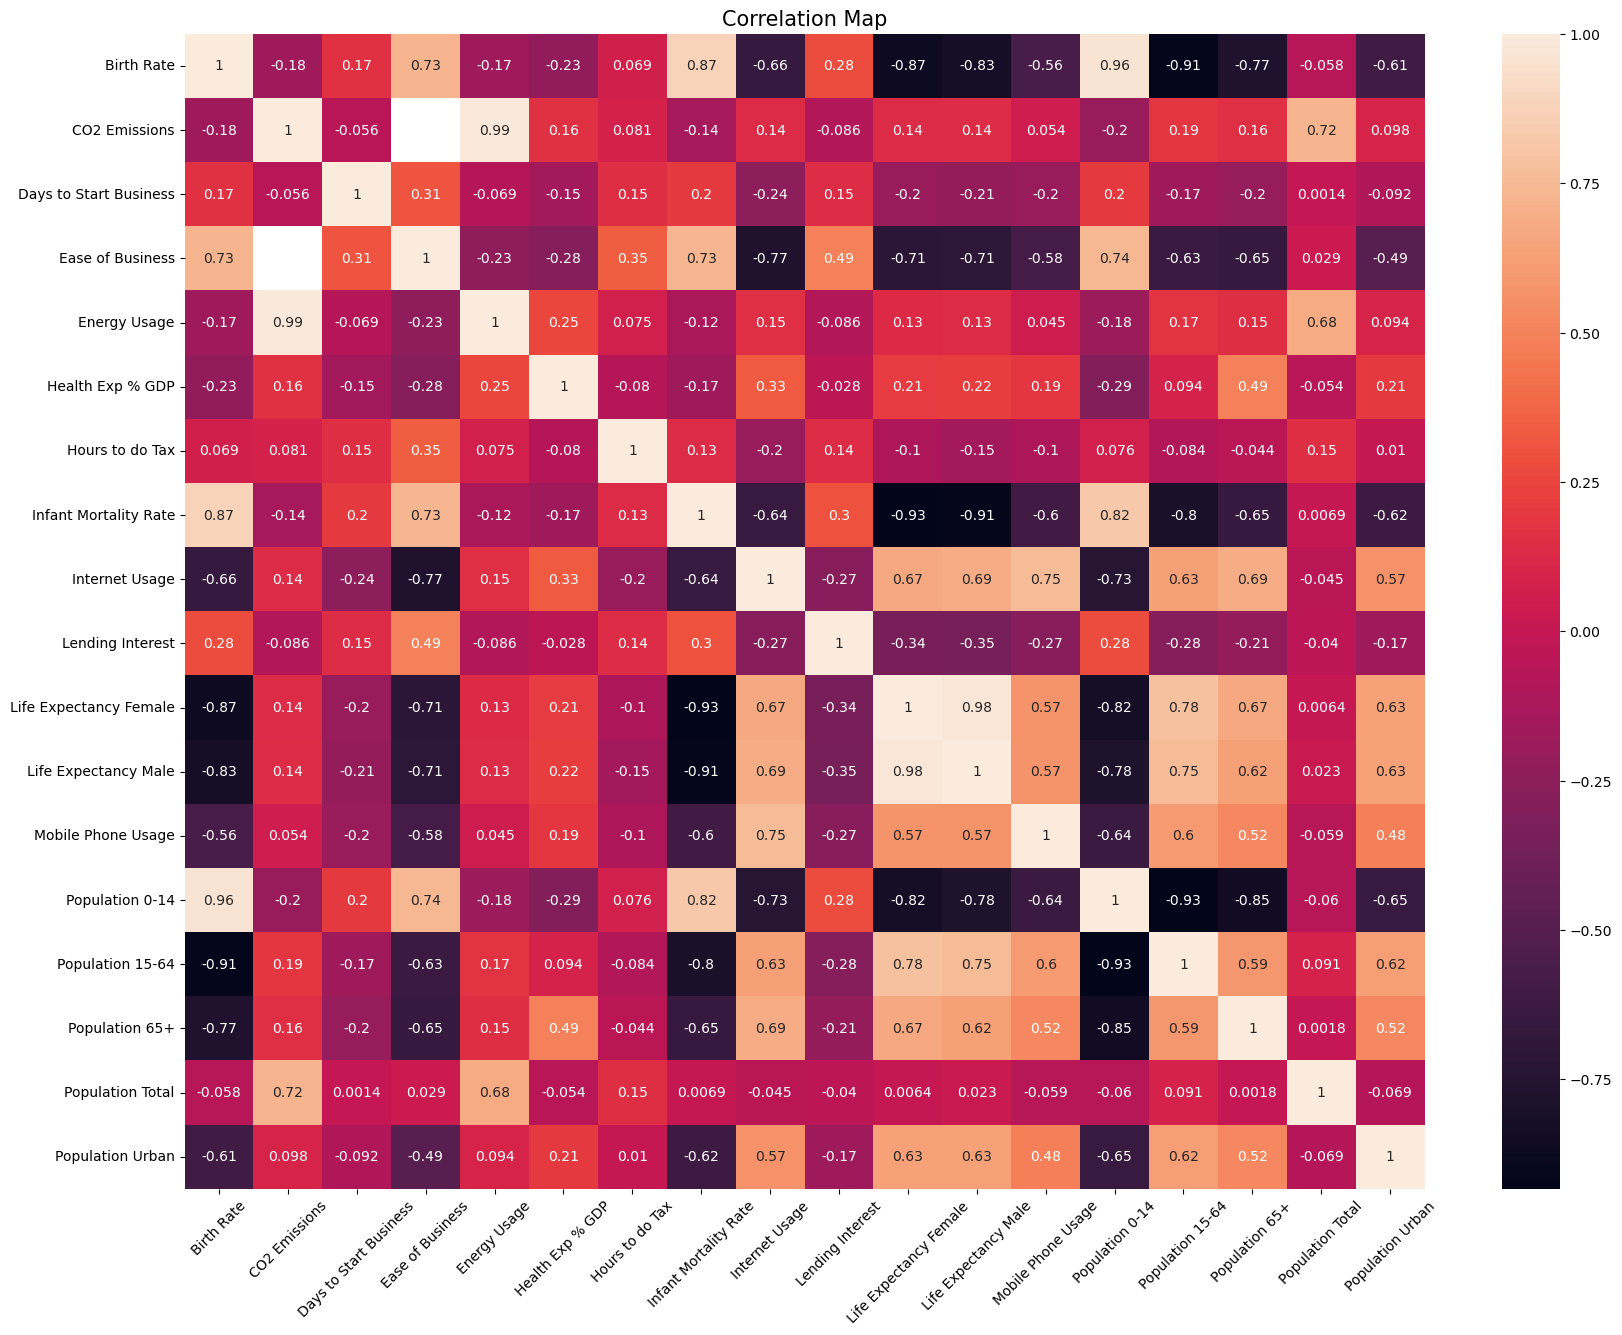

In [413]:
#corelation Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=45) 
plt.title("Correlation Map", fontsize=15)
plt.show()

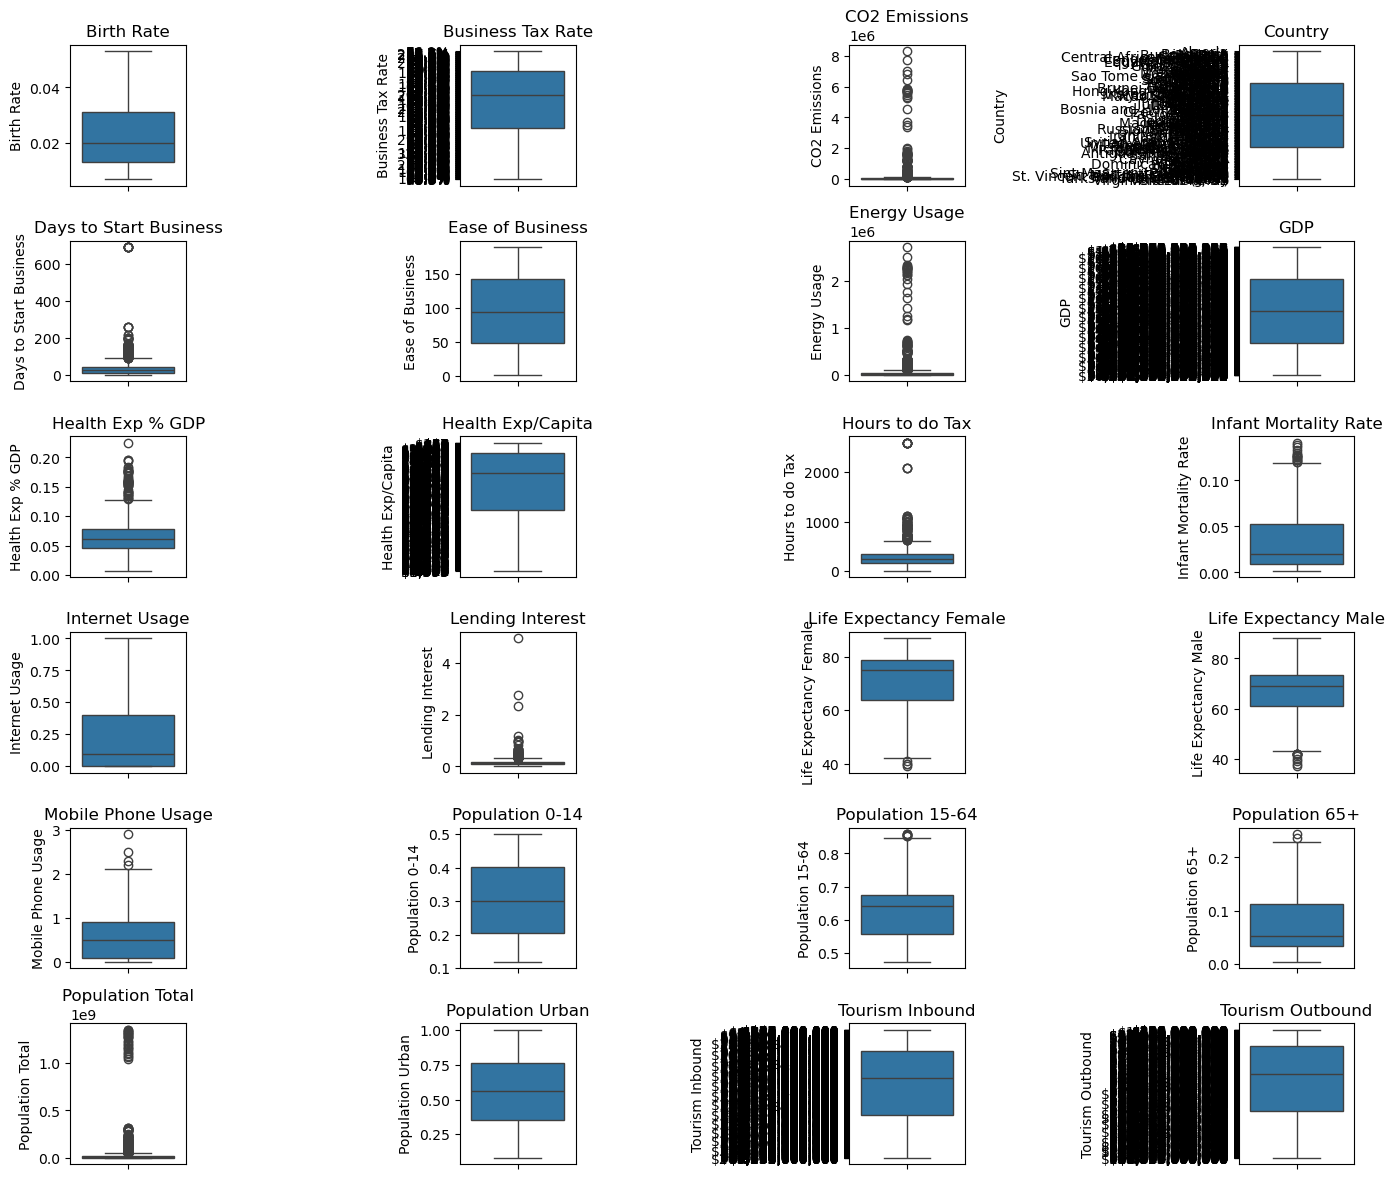

In [416]:
#Outliers
fig, axes = plt.subplots(6, 4, figsize=(14, 12), sharex=False, sharey=False)
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(pad=2.0)
plt.show()

In [386]:
#Encoding
df['Country'].nunique()

208

In [387]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
df['Country_encoded'] = le.fit_transform(df['Country'])
df['Country_encoded']=df['Country_encoded'].astype(float)
df.drop(['Country'],axis=1,inplace=True)

In [388]:
df.shape

(2704, 25)

In [389]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
Country_encoded              0
dtype: int64

In [390]:
#Converting GDP to float
df['GDP']=df['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
df['GDP']=pd.to_numeric(df['GDP'],errors='coerce')

In [391]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_num = imputer.fit_transform(df_num)
df_cat = df_cat.fillna(df_cat.mode().iloc[0])

In [392]:
#Selecting most important columns for most accuracte silhouette score
#features = df[['GDP', 'CO2 Emissions', 'Energy Usage','Internet Usage','Business Tax Rate','Population Total','']]

In [393]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [394]:
# ipython-input-8-653e5590320e
# Selecting most important columns for most accurate silhouette score
features = df[['GDP', 'CO2 Emissions', 'Energy Usage','Internet Usage']]

# Impute NaN values in 'features' before standardization
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # Create an imputer with 'median' strategy
features = imputer.fit_transform(features) # Impute NaN values in 'features'

# ipython-input-9-653e5590320e
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

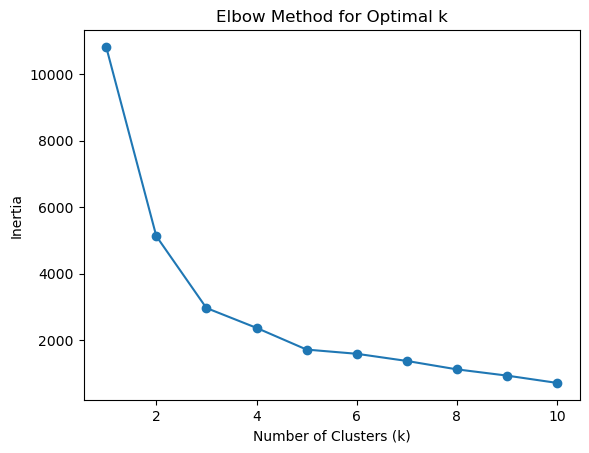

In [395]:
#K-means clustering
inertia = []
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(features_standardized)
  inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [396]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(features_standardized)

In [397]:
#Accuracy
from sklearn.metrics import silhouette_score
s_kmeans = silhouette_score(features_standardized,y_kmeans)
print('Silhouette score:', s_kmeans)

Silhouette score: 0.9184328668553314


In [398]:
#DBScans Clustering model
best_eps = 0
best_min_samples = 0
best_score = -1

eps_values = np.arange(0.1, 2.0, 0.1) 
min_sample_values = range(2, 11) 

In [399]:
for eps in eps_values:
  for min_samples in min_sample_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(features_standardized)
    
    # Check if there's more than one cluster and noise points
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    if n_clusters > 1 : #and list(dbscan_labels).count(-1)>0:
      silhouette_avg = silhouette_score(features_standardized, dbscan_labels)
      if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_eps = eps
        best_min_samples = min_samples
        print(f"New best score: {best_score:.4f} with eps={best_eps:.1f}, min_samples={best_min_samples}")

New best score: 0.6201 with eps=0.1, min_samples=2
New best score: 0.6326 with eps=0.2, min_samples=2
New best score: 0.6529 with eps=0.7, min_samples=3
New best score: 0.6809 with eps=0.7, min_samples=8
New best score: 0.6993 with eps=0.8, min_samples=2
New best score: 0.7013 with eps=0.9, min_samples=2
New best score: 0.7019 with eps=1.0, min_samples=2
New best score: 0.7025 with eps=1.2, min_samples=2
New best score: 0.8400 with eps=1.7, min_samples=3
New best score: 0.8819 with eps=1.7, min_samples=4
New best score: 0.8872 with eps=1.7, min_samples=7


In [400]:
#DBSCAN with optimal hyperparameters
dbscan_optimal = DBSCAN(eps = best_eps, min_samples = best_min_samples)
dbscan_optimal_labels = dbscan_optimal.fit_predict(features_standardized)
s_dbscan = silhouette_score(features_standardized, dbscan_optimal_labels)
print('Silhouette score for DBSCAN with optimal params:', s_dbscan)

Silhouette score for DBSCAN with optimal params: 0.8872066524029224


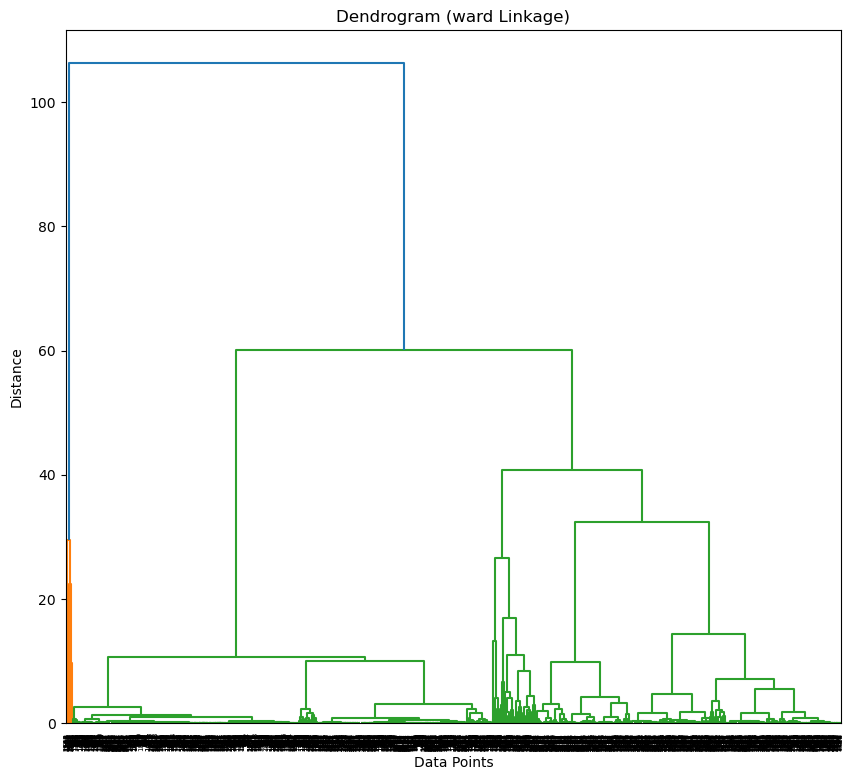

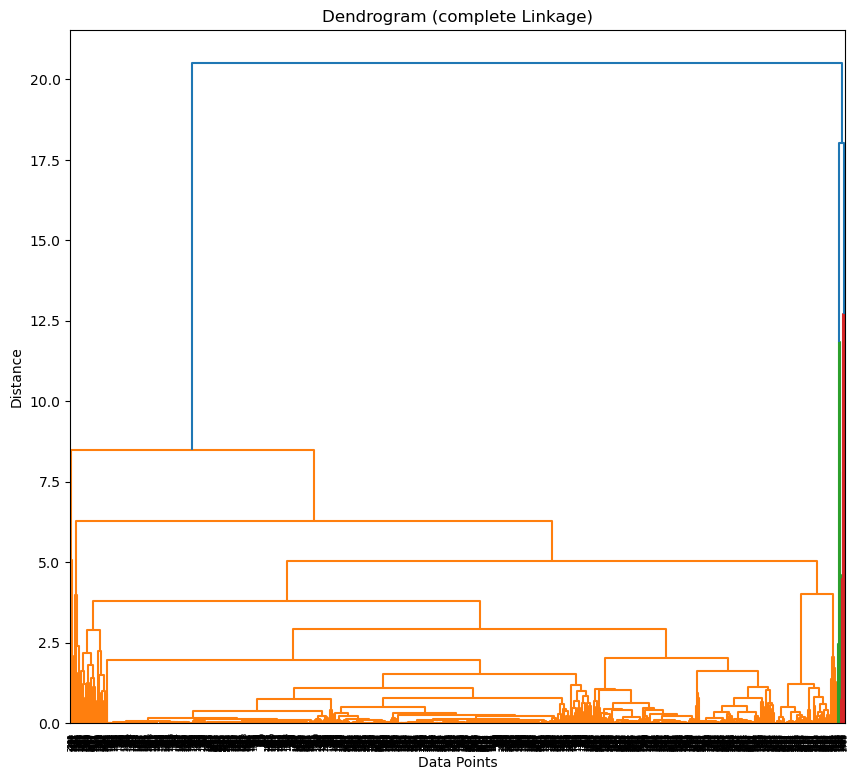

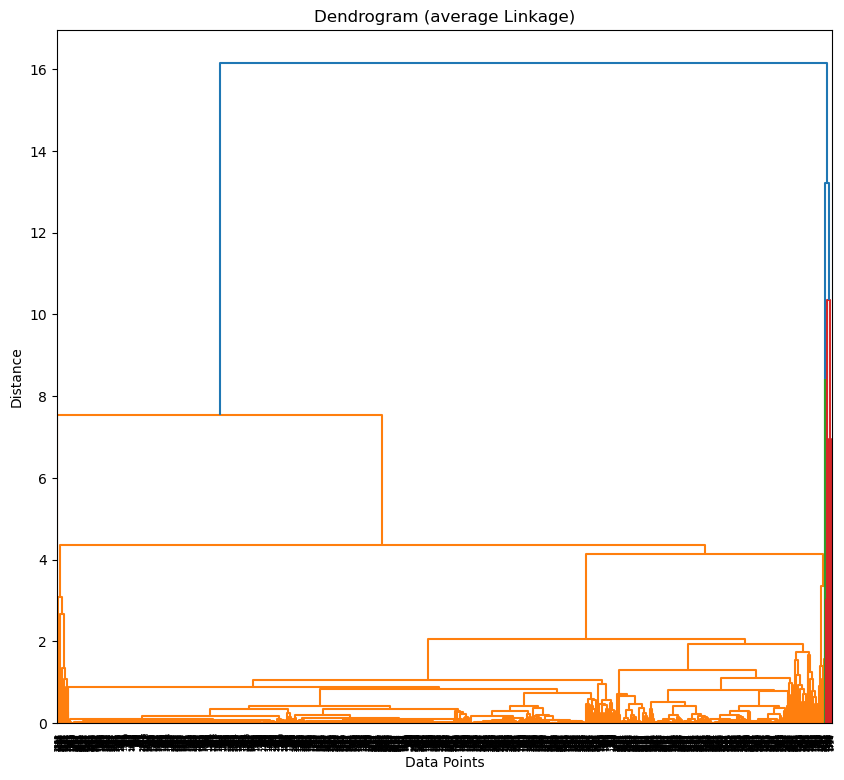

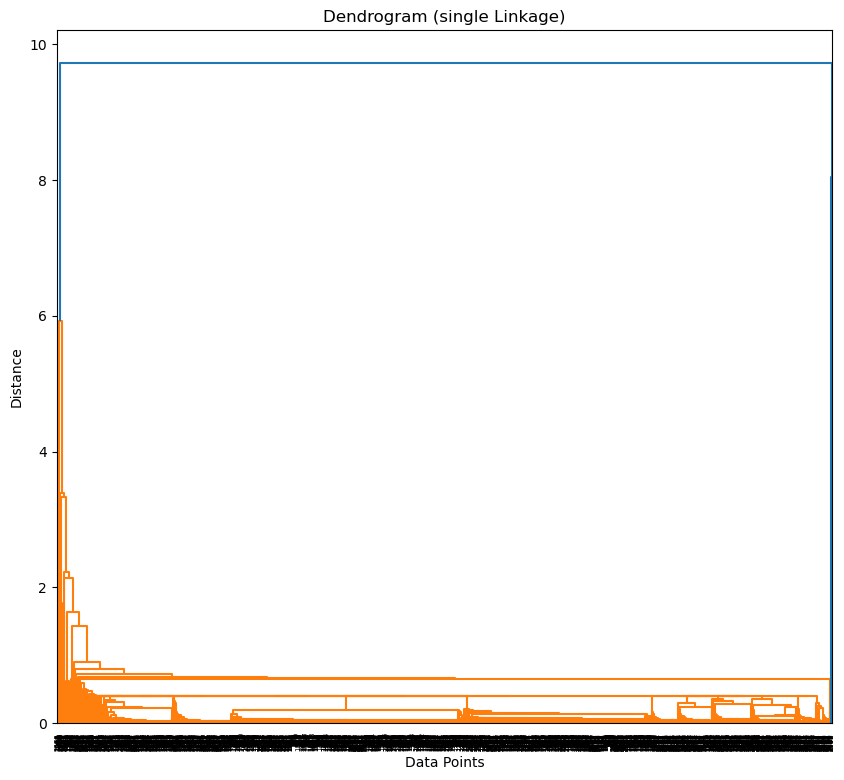

In [401]:
#Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Experiment with Hierarchical Clustering (Linkage Criteria)
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
  plt.figure(figsize=(10, 9))
  dendrogram(linkage(features_standardized, method=method))
  plt.title(f'Dendrogram ({method} Linkage)')
  plt.xlabel('Data Points')
  plt.ylabel('Distance')
  plt.show()

In [402]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2,linkage = 'ward')
y_ac = ac.fit_predict(features_standardized)

In [403]:
s_hierarchy = silhouette_score(features_standardized,y_ac)
print('Silhouette Score for Agglomerative clustring :',s_hierarchy)

Silhouette Score for Agglomerative clustring : 0.9196382931229397


In [404]:
#The Silhouette_scores

data = {
    'Model': ['KMEANS Silhouette Score', 'DBSCAN Silhouette Score', 'Agglomerative Clustering Silhouette Score'],
    'Accuracy': [0.918, 0.887, 0.919]  
}

df_results = pd.DataFrame(data)
df_results

,Model,Accuracy
0,KMEANS Silhouette Score,0.918
1,DBSCAN Silhouette Score,0.887
2,Agglomerative Clustering Silhouette Score,0.919
